In [1]:
# coding: utf-8
!pip install pillow pandas numpy


Defaulting to user installation because normal site-packages is not writeable


In [4]:

import os
import pandas as pd
import numpy as np
from numpy import asarray

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/guillaume/.local/lib/python3.7/site-packages/tensorboar

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [4]:
with open("train/train.csv", 'r') as file:
    df = pd.read_csv(file)
from shutil import copyfile
#print(df.columns)
#print(df.head())
#list_dir = os.listdir("train_images/")
#classes = df["AdoptionSpeed"].unique()
#df = df[df["Quantity"] == 1]
#adoptionSpeed, photos = [], []
#for pet_id in df["PetID"]:
#    for file in [file for file in list_dir if file.startswith(pet_id)]:
#        new_loc = os.path.join(str(df.loc[df["PetID"] == pet_id, "AdoptionSpeed"].item()), file)
#        copyfile(os.path.join("train_images/", file), new_loc)
        

In [13]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_dir = "train_photos/"


In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)


train_generator = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_image_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data


Found 29208 images belonging to 5 classes.
Found 12515 images belonging to 5 classes.


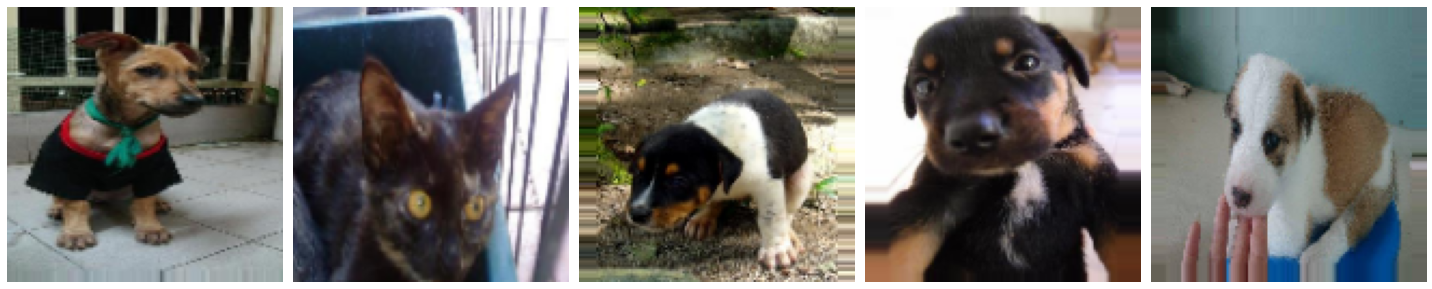

In [15]:
sample_training_images, _ = next(train_generator)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])


In [16]:
def get_compiled_model():
    model = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(10, activation='relu'),
        Dense(1)
        ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

In [25]:
df.drop(["RescuerID", "State", "VideoAmt", "Description", "Name", "PetID", "PhotoAmt", "Quantity"], axis = 1, inplace = True)

X = df.drop("AdoptionSpeed", axis = 1)
y = df["AdoptionSpeed"]

In [17]:
model = get_compiled_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [18]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
 array([[[[-0.07398295,  0.08198503, -0.13272017,  0.11992046,
            0.13666797,  0.03124754,  0.01417072, -0.18127209,
            0.1212166 ,  0.06754971,  0.13271391,  0.09828174,
            0.10456574,  0.01615429, -0.15975425, -0.09362147],
          [-0.02183047,  0.0479193 , -0.11814734,  0.05379444,
            0.15736029, -0.1157442 ,  0.16601074,  0.0947175 ,
           -0.07491335,  0.07514518, -0.08560417, -0.17844762,
            0.00754417, -0.077677  ,  0.10684803, -0.15656075],
          [ 0.05789356,  0.02123564, -0.06643815,  0.13821208,
            0.09092107, -0.10699094, -0.05614395, -0.09471448,
           -0.00667809, -0.12500125, -0.11724954, -0.11404118,
           -0.09309645, -0.14868163, -0.1547869 , -0.09103477]],
 
         [[-0.12889837,  0.04492722, -0.12155619, -0.18465525,
           -0.0711412 , -0.17210382, -0.15262786, -0.06734359,
            0.0608241 , -0.06025673,  

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples,
    epochs = epochs)
history

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 29208 steps, validate for 12515 steps
   24/29208 [..............................] - ETA: 16:41:17 - loss: -1017.4444 - accuracy: 0.2014

KeyboardInterrupt: 

In [ ]:
history.score